In [2]:
# Réaliser par :

# AMIR Abderrahmane
# BELLACHE Adam
# DIAB Hicham
# BOUTICHE Ahmad 

In [3]:
def drop(P_labels, Q_labels, to_drop):
    global state
    found = False

    if(state[0] == "a"):
        index1 = 0
    elif(state[0] == "b"):
        index1 = 1
    elif(state[0] == "c"):
        index1 = 2
    elif(state[0] == "d"):
        index1 = 3

    if(state[1] == "w"):
        index2 = 0
    elif(state[1] == "z"):
        index2 = 1
    elif(state[1] == "y"):
        index2 = 2
    elif(state[1] == "x"):
        index2 = 3

    i = 0
    j = 0

    if(to_drop == 0):
        if(P_labels[index1][1] == 0):
            var = P_labels[index1][2] #save index which is not dropped (1)
        else:
            var = P_labels[index1][1]

        
        while(i < len(P_labels) and not found): #search label with same index (index en commun)
            if(i == index1):
                i += 1
            if(P_labels[i][1] == var or P_labels[i][2] == var):
                state = (P_labels[i][0], state[1])
                found = True
            i += 1
    elif(to_drop == 1):
        if(P_labels[index1][1] == 1):
            var = P_labels[index1][2] #save index which is not dropped (2)
        else:
            var = P_labels[index1][1]
        while(i < len(P_labels) and not found): #search label with same index (index en commun)
            if(i == index1):
                i += 1
            if(P_labels[i][1] == var or P_labels[i][2] == var):
                state = (P_labels[i][0], state[1])
                found = True
            i += 1
    elif(to_drop == 2):
        if(Q_labels[index2][1] == 2):
            var = Q_labels[index2][2] #save index which is not dropped (3)
        else:
            var = Q_labels[index2][1]
        while(j < len(Q_labels) and not found): #search label with same index (index en commun)
            if(j == index2):
                j += 1
            if(Q_labels[j][1] == var or Q_labels[j][2] == var):
                state = (state[0], Q_labels[j][0])
                found = True
            j += 1
    elif(to_drop == 3):
        if(Q_labels[index2][1] == 3):
            var = Q_labels[index2][2] #save index which is not dropped (2)
        else:
            var = Q_labels[index2][1]
        while(j < len(Q_labels) and not found): #search label with same index (index en commun)
            if(j == index2):
                j += 1
            if(Q_labels[j][1] == var or Q_labels[j][2] == var):
                state = (state[0], Q_labels[j][0])
                found = True
            j += 1  


In [4]:
def pickup(state, P_labels, Q_labels):
    i = 0
    found = False

    while(i < len(P_labels) and not found):
        if(P_labels[i][0] == state[0]):
            t1 = (P_labels[i][1], P_labels[i][2])
            found = True
        i += 1

    i = 0
    found = False

    while(i < len(Q_labels) and not found):
        if(Q_labels[i][0] == state[1]):
            t2 = (Q_labels[i][1], Q_labels[i][2])
            found = True
        i += 1

    #index en commun
    res = [ele1 for ele1 in t1
    for ele2 in t2 if ele1 == ele2]

    return res

In [5]:
def get_state_tuple(s1, s2, P_labels, Q_labels):
    found = False
    i = 0
    #récuperer les labels associer à state[0]
    while(i < len(P_labels) and not found):
        if(P_labels[i][0] == s1):
            t1 = (P_labels[i][1], P_labels[i][2])
            found = True
        i += 1
    
    found = False
    i = 0
    #récuperer les labels associer à state[1]
    while(i < len(Q_labels) and not found):
        if(Q_labels[i][0] == s2):
            t2 = (Q_labels[i][1], Q_labels[i][2])
            found = True
        i += 1
    
    return t1, t2

In [6]:
def get_Enash(state, P_coord, Q_coord):
    i = 0
    found = False
    #récuperer les coordonées de state[0] final
    while(i < len(P_coord) and not found):
        if(state[0] == P_coord[i][0]):
            res1 = (P_coord[i][1], P_coord[i][2])
            found = True
        i += 1
    
    i = 0
    found = False
    #récuperer les coordonées de state[1] final
    while(i < len(Q_coord) and not found):
        if(state[1] == Q_coord[i][0]):
            res2 = (Q_coord[i][1], Q_coord[i][2])
            found = True
        i += 1

    print("coord: ", res1, res2)
    #normalisation des coordonées obtenue pour que leur somme soit égale à 1 (probabilité)
    res1_norm = (res1[0]/(res1[0]+res1[1]), res1[1]/(res1[0]+res1[1]))
    res2_norm = (res2[0]/(res2[0]+res2[1]), res2[1]/(res2[0]+res2[1]))
    return res1_norm, res2_norm

<Figure size 640x480 with 0 Axes>

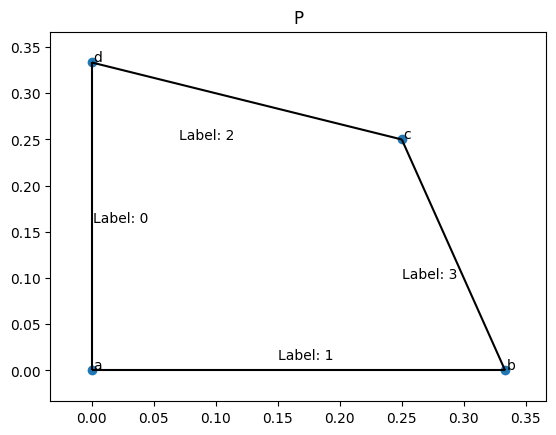

<Figure size 640x480 with 0 Axes>

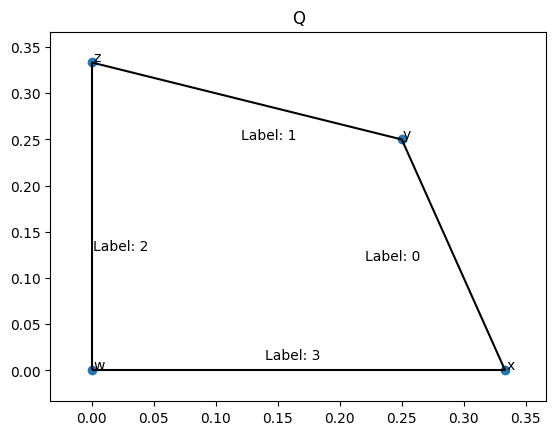

In [7]:
#MAIN

#On affiche les deux polytopes P et Q
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial
import nashpy as nash

V = [np.array([0, 0]), np.array([0, 1 / 3]), np.array([1 / 3,  0]), np.array([1 / 4, 1 / 4])]
P = scipy.spatial.ConvexHull(V)
plt.figure()
scipy.spatial.convex_hull_plot_2d(P)
plt.title("P")
plt.text(0.001, .16, "Label: 0")
plt.text(0.15, .012, "Label: 1")
plt.text(0.07, .25, "Label: 2")
plt.text(0.25, .1, "Label: 3")
for v, s in zip(V, "adbc"):
    plt.text(v[0] + 0.001, v[1] + 0.001, s)

V = [np.array([0, 0]), np.array([1 / 3 , 0]), np.array([0,  1 / 3]), np.array([1 / 4, 1 / 4])]
Q = scipy.spatial.ConvexHull(V)
plt.figure()
scipy.spatial.convex_hull_plot_2d(Q)
plt.title("Q")
plt.text(0.001, .13, "Label: 2")
plt.text(0.14, .012, "Label: 3")
plt.text(0.12, .25, "Label: 1")
plt.text(0.22, .119, "Label: 0")
for v, s in zip(V, "wxzy"):
    plt.text(v[0] + 0.001, v[1] + 0.001, s)

In [8]:
#chaque sommet avec ses labels
P_labels = [["a", 0, 1], ["b", 1, 3], ["c", 3, 2], ["d", 2, 0]]
Q_labels = [["w", 2, 3], ["z", 1, 2], ["y", 1, 0], ["x", 0, 3]]
state = ("a", "w")
#les coordonnées de chaque sommet
P_coord = [["a", 0, 0], ["b", 1/3, 0], ["c", 1/4, 1/4], ["d", 0, 1/3]]
Q_coord = [["w", 0, 0], ["z", 0, 1/3], ["y", 1/4, 1/4], ["x", 1/3, 0]]

#saisir le premier label à supprimer
x = input("Entrer le numéro du premier label à supprimer:")

print("state", state)
print("drop "+ x)
#on supprime le premier label
drop(P_labels, Q_labels, int(x))
print("state", state)
#on verifie l'union des label de P et Q si ils sont complets
c1, c2 = get_state_tuple(state[0], state[1], P_labels, Q_labels)
res = tuple(set(c1 + c2))

#TQ l'union de P et Q n'est pas egale à (0, 1, 2, 3)
while(res != (0, 1, 2, 3)):
    x = pickup(state, P_labels, Q_labels)
    print("pickup ", x[0])

    print("drop", x[0])
    drop(P_labels, Q_labels, x[0])
    print("state", state)

    c1, c2 = get_state_tuple(state[0], state[1], P_labels, Q_labels)
    res = tuple(set(c1 + c2))
    print("union", res)

#On est dans le cas où l'union de P et Q égale à (0, 1, 2, 3)
print("\nFully labelled vertex pair")
print("Equilibre de NASH à:", state)
r1, r2 = get_Enash(state, P_coord, Q_coord)
print("Après normalisation: ", r1, r2)

state ('a', 'w')
drop 2
state ('a', 'x')
pickup  0
drop 0
state ('b', 'x')
union (0, 1, 3)
pickup  3
drop 3
state ('b', 'y')
union (0, 1, 3)
pickup  1
drop 1
state ('c', 'y')
union (0, 1, 2, 3)

Fully labelled vertex pair
Equilibre de NASH à: ('c', 'y')
coord:  (0.25, 0.25) (0.25, 0.25)
Après normalisation:  (0.5, 0.5) (0.5, 0.5)


In [9]:
#Vérification avec la fonction prédéfinie lemke_howson_enumeration()

import nashpy as nash

A = np.array([[3, 1], [1, 3]])
B = np.array([[1, 3], [3, 1]])
game = nash.Game(A, B)
print("Equilibre de NASH pour tous les cas de début de suppression des labels:")
list(game.lemke_howson_enumeration())

Equilibre de NASH pour tous les cas de début de suppression des labels:


[(array([0.5, 0.5]), array([0.5, 0.5])),
 (array([0.5, 0.5]), array([0.5, 0.5])),
 (array([0.5, 0.5]), array([0.5, 0.5])),
 (array([0.5, 0.5]), array([0.5, 0.5]))]